In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [2]:
ds_orig = pd.read_csv('ds-cleaned.csv', index_col="date")
ds = ds_orig
# ds.info

In [3]:
ds.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,30.572857,26.629999,26.129884,42.070000,37.090000,31.670000,31.469999,...,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,25.226457,60.020000,13.33
2010-01-05,22.145923,5.31,40.139999,30.625713,26.440001,25.918773,42.330002,37.700001,31.620001,31.639999,...,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,25.140187,61.919998,13.80
2010-01-06,22.067240,5.09,40.490002,30.138571,26.190001,26.062713,42.779999,37.619999,31.559999,31.559999,...,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,24.960462,61.900002,15.00
2010-01-07,22.038626,5.24,40.480000,30.082857,25.770000,26.278623,42.740002,36.889999,31.309999,31.230000,...,20.780001,18.400000,24.639999,69.800003,35.599998,8.60,16.700001,24.953272,63.320000,16.68
2010-01-08,22.031474,5.14,40.639999,30.282858,26.049999,26.412967,42.570000,36.689999,31.490000,30.840000,...,20.790001,18.200001,25.000000,69.519997,35.599998,8.57,16.700001,24.960462,61.990002,16.41


In [4]:
# Standardizing the features
ds = StandardScaler().fit_transform(ds)
pca_obj = PCA()
pca_obj.fit(ds)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

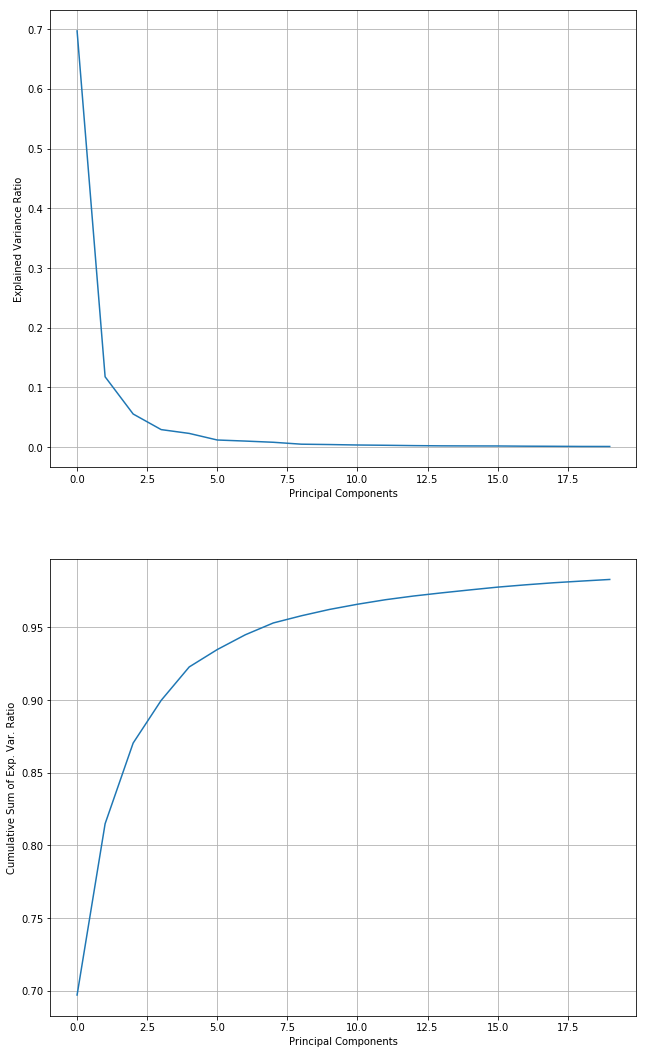

In [5]:
num_component = 20
fig, axs = plt.subplots(2,1, sharey=False)
axs[0].plot(np.array(range(len(pca_obj.explained_variance_ratio_)))[:num_component], 
         pca_obj.explained_variance_ratio_[:num_component])
axs[0].set_xlabel('Principal Components')
axs[0].set_ylabel('Explained Variance Ratio')
# axs[0].set_title('ax0 title')
axs[0].grid()


axs[1].plot(np.array(range(len(pca_obj.explained_variance_ratio_)))[:num_component], 
         np.cumsum(pca_obj.explained_variance_ratio_)[:num_component])
axs[1].set_xlabel('Principal Components')
axs[1].set_ylabel('Cumulative Sum of Exp. Var. Ratio')
# axs[1].set_title('ax1 title')
axs[1].grid()

fig.set_size_inches(10.5, 18.5)
fig.savefig('PCA-graphs.png', dpi=100)

In [6]:
variance_coverage = 0.99
for num, elem in enumerate(np.cumsum(pca_obj.explained_variance_ratio_)):
    if elem > variance_coverage:
        print('The first "{}" principal components cover {} of the variance.'.format(num+1, variance_coverage)); break

The first "32" principal components cover 0.99 of the variance.


In [7]:
pca_obj.components_.shape[0]

470

In [8]:
# Get variance of each factors
pd.DataFrame(pca_obj.components_, index=1+np.array((list(range(pca_obj.components_.shape[0])))),
            columns = ds_orig.columns)

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
1,0.051338,0.051962,0.052822,0.049048,0.051863,0.051940,0.052658,0.052606,0.053516,0.046821,...,0.050737,0.053075,0.050207,0.031979,0.052489,0.027792,0.051584,0.049659,0.053604,0.042579
2,-0.013974,-0.003930,0.016800,0.002590,0.003151,-0.015838,0.024617,0.033319,0.001377,-0.035329,...,0.036428,-0.009435,-0.016609,-0.084273,0.030573,-0.047952,-0.021960,-0.014550,0.000864,-0.026320
3,-0.015201,-0.035122,-0.007933,0.032975,-0.019269,0.010644,0.031437,-0.018726,-0.001671,-0.064384,...,0.040526,-0.003546,0.018168,0.062027,0.009936,-0.128421,-0.031849,0.057378,-0.012041,-0.063194
4,0.067598,-0.044556,-0.027788,-0.041305,-0.070509,-0.069414,0.022310,0.014816,0.019678,-0.005476,...,0.032963,-0.034890,0.052104,0.078781,0.013559,-0.014808,-0.013144,0.020491,0.001466,0.041296
5,-0.021808,-0.019698,-0.042861,-0.084754,-0.042618,-0.003684,0.007295,0.022838,-0.013150,-0.037880,...,-0.011422,0.004364,0.031131,-0.009064,0.005863,-0.039277,0.019042,-0.024686,0.009005,0.083718
6,-0.024786,0.035351,-0.013655,0.030095,-0.015218,0.029071,-0.037396,-0.000330,-0.037849,0.049189,...,0.038851,-0.046555,-0.079280,0.012554,-0.024111,0.065174,0.061789,-0.027192,0.054743,-0.069789
7,-0.019000,-0.030823,-0.030665,0.018190,0.004939,0.012236,0.010379,-0.034739,0.048343,-0.010607,...,-0.005778,0.047985,-0.046795,-0.022949,-0.016076,-0.017150,-0.015142,0.030057,-0.015962,0.075859
8,-0.014061,0.012004,0.018453,0.098329,-0.015470,0.013444,-0.000362,0.012269,0.043934,0.018713,...,-0.040350,-0.037170,0.027041,-0.023973,-0.027585,-0.119731,-0.008934,0.064057,-0.034119,0.107310
9,0.036472,-0.043521,-0.018056,-0.021805,0.023705,-0.013911,-0.020887,-0.013677,-0.005063,0.027009,...,0.007675,-0.042857,0.030075,-0.046944,0.020304,0.055025,0.065447,0.013629,0.022739,-0.030157
10,0.033387,-0.073553,-0.047762,-0.020183,0.040000,0.038781,0.045056,0.008724,0.028567,-0.009823,...,-0.023150,0.019557,-0.007077,0.054437,0.036736,-0.117898,-0.041005,0.003527,0.041321,-0.023016


In [9]:
print(pca_obj.components_.shape)

ds_pca_math1 = np.matmul(ds, (pca_obj.components_))
ds_pca_math2 = np.matmul(ds, np.transpose(pca_obj.components_))

print(ds_pca_math1.shape, ds_pca_math1.shape)
ds_pca = pca_obj.transform(ds)
print(ds_pca.shape)

print((ds_pca - ds_pca_math1)[0][0])
print((ds_pca - ds_pca_math2)[0][0])

(470, 470)
(1762, 470) (1762, 470)
(1762, 470)
-27.114913576501095
-1.4210854715202004e-14


In [10]:
ds_pca - ds_pca_math2

array([[-1.42108547e-14, -8.88178420e-16,  0.00000000e+00, ...,
         3.33066907e-16, -5.55111512e-17, -1.52655666e-16],
       [ 3.55271368e-15,  0.00000000e+00,  1.77635684e-15, ...,
        -6.66133815e-16, -2.77555756e-16, -1.38777878e-17],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -7.77156117e-16,  1.11022302e-16,  1.11022302e-16],
       ...,
       [ 0.00000000e+00,  8.88178420e-16, -8.88178420e-16, ...,
        -2.22044605e-16, -3.33066907e-16, -2.77555756e-17],
       [-7.10542736e-15,  1.77635684e-15,  8.88178420e-16, ...,
         5.55111512e-17, -1.11022302e-16,  2.77555756e-17],
       [ 3.55271368e-15, -1.77635684e-15,  1.77635684e-15, ...,
        -4.44089210e-16, -1.11022302e-16,  0.00000000e+00]])

In [10]:
np.allclose(ds_pca, ds_pca_math2)

True

In [11]:
np.array_equal(ds_pca, ds_pca_math2)

False

In [12]:
columns_name = []
for id_component in range(num+1):
    columns_name.append('Pr.Cmp.{}'.format(id_component+1))

pca_dataframe = pd.DataFrame(data=ds_pca[:,:num+1], index=ds_orig.index, columns = np.array(columns_name))
pca_dataframe.to_csv('pca_ds.csv')

In [23]:
# pca_dataframe.info

In [13]:
pca_dataframe.head()

,Pr.Cmp.1,Pr.Cmp.2,Pr.Cmp.3,Pr.Cmp.4,Pr.Cmp.5,Pr.Cmp.6,Pr.Cmp.7,Pr.Cmp.8,Pr.Cmp.9,Pr.Cmp.10,...,Pr.Cmp.23,Pr.Cmp.24,Pr.Cmp.25,Pr.Cmp.26,Pr.Cmp.27,Pr.Cmp.28,Pr.Cmp.29,Pr.Cmp.30,Pr.Cmp.31,Pr.Cmp.32
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-26.273623,6.183423,-7.332613,-2.137729,5.453081,4.528554,-1.428401,0.498633,1.240009,4.368034,...,-1.298631,1.006367,-0.475143,0.687889,0.409665,-0.976296,-0.494811,0.022935,-0.176910,0.970539
2010-01-05,-26.232157,5.865321,-7.573994,-2.217217,5.619651,4.293791,-1.310530,0.541230,1.121403,4.438900,...,-1.330092,0.922321,-0.405114,0.577371,0.441079,-0.893004,-0.570387,-0.000757,-0.129933,0.991612
2010-01-06,-26.190128,5.615850,-7.682051,-2.079926,5.665150,4.234165,-1.331542,0.653778,1.079693,4.601344,...,-1.290930,0.907462,-0.227668,0.615254,0.550370,-0.828052,-0.599419,-0.034793,0.002300,0.994555
2010-01-07,-25.875643,5.464734,-7.844105,-2.055173,5.807519,3.998705,-1.156246,0.841586,1.135400,4.624234,...,-1.185567,0.865775,-0.201365,0.539549,0.622051,-0.775688,-0.546626,-0.171277,-0.132307,1.050452
2010-01-08,-25.782206,5.278445,-7.945232,-1.784316,5.689758,3.898988,-1.189545,0.888835,1.103353,4.650648,...,-1.187756,0.929825,-0.287433,0.454393,0.566082,-0.767646,-0.515122,-0.101857,-0.131569,1.124683


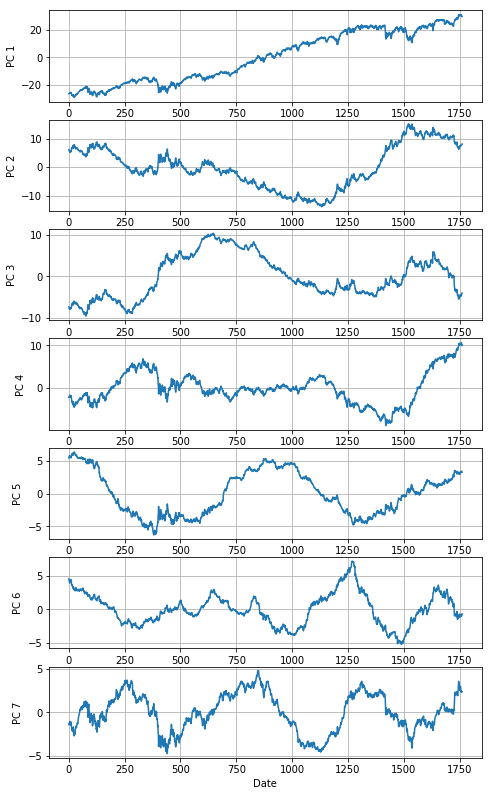

In [25]:
fig, axs = plt.subplots(7, 1, sharey=False)
Pr_Cmp_index = [1, 2, 3, 4,5, 6, 7]
axs[0].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[0]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[0]-1])
axs[0].set_ylabel('PC {}'.format(Pr_Cmp_index[0]))
axs[0].set_xlabel('Date')
# axs[0].set_title('ax0 title')
axs[0].grid()


axs[1].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[1]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[1]-1])
axs[1].set_ylabel('PC {}'.format(Pr_Cmp_index[1]))
axs[1].set_xlabel('Date')
# axs[1].set_title('ax1 title')
axs[1].grid()

axs[2].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[2]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[2]-1])
axs[2].set_ylabel('PC {}'.format(Pr_Cmp_index[2]))
axs[2].set_xlabel('Date')

axs[2].grid()

axs[3].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[3]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[3]-1])
axs[3].set_ylabel('PC {}'.format(Pr_Cmp_index[3]))
axs[3].set_xlabel('Date')
# axs[0].set_title('ax0 title')
axs[3].grid()

axs[4].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[4]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[4]-1])
axs[4].set_ylabel('PC {}'.format(Pr_Cmp_index[4]))
axs[4].set_xlabel('Date')
# axs[0].set_title('ax0 title')
axs[4].grid()

axs[5].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[5]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[5]-1])
axs[5].set_ylabel('PC {}'.format(Pr_Cmp_index[5]))
axs[5].set_xlabel('Date')
# axs[0].set_title('ax0 title')
axs[5].grid()

axs[6].plot(np.array(range(len(pca_dataframe.values[:, Pr_Cmp_index[6]-1]))),
                           pca_dataframe.values[:, Pr_Cmp_index[6]-1])
axs[6].set_ylabel('PC {}'.format(Pr_Cmp_index[6]))
axs[6].set_xlabel('Date')
# axs[0].set_title('ax0 title')
axs[6].grid()
axs[6].grid()
axs[6].set_ylabel('PC {}'.format(Pr_Cmp_index[6]))
axs[6].set_xlabel('Date')
# axs[0].set_title('ax0 title')
axs[6].grid()

fig.set_size_inches(15.5/2, 27.5/2)
fig.savefig('PCA-graphs-2.png', dpi=100)